# **AIMS | Monte Carlo Mehtods for Machine Learning**

# **Problems for week 2:Markov Chain Monte Carlo**

Astride Melvin Fokam Ninyim

Last updated: 17 Nov 2025

Python 3

Reference:
-  https://www.geeksforgeeks.org/engineering-mathematics/random-variable/

- https://www.geeksforgeeks.org/maths/histogram/

- https://www.geeksforgeeks.org/dsa/estimating-value-pi-using-monte-carlo/

- https://www.geeksforgeeks.org/artificial-intelligence/markov-chain-monte-carlo-mcmc/

- https://appliedmaths.sun.ac.za/~htouchette/aims/gaussmcmc1.pdf

- course work

- https://youtu.be/3qodjHRUxAo

- https://youtu.be/18Sh8Uh8pAg

# **Numerical**

In [147]:
#import the requirements librairies 
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import random
from ipywidgets import interact, FloatSlider, IntSlider
import ipywidgets as widgets
import numpy as np
import scipy.stats as stats


### Q1. **MCMC estimation of $\pi$**. Estimate $\pi$ as done in CW1, replacing the independent points by a random walk in the square. You can use symmetric displacements for the random walk.

1 -Generate points using random walk in the square with uniform proposal distribution

In [148]:
# (a) Generate points using random walk in the square and show uniformity
niter = 10**5
x, y = 0.0, 0.0  # Initial position
trajectory = []
accepted = 0
sigma = 0.5  # Standard deviation for symmetric displacement (uniform distribution)

for i in range(niter):
    # Propose new position using symmetric uniform distribution  displacement
    x_prop = x + np. random.uniform(-1, 1)
    y_prop = y + np. random.uniform(-1, 1)
    
    # Accept only if within square [-1, 1] x [-1, 1]
    if -1 <= x_prop <= 1 and -1 <= y_prop <= 1:
        x, y = x_prop, y_prop
        accepted += 1
    
    trajectory.append([x, y])

trajectory = np.array(trajectory)
acceptance_ratio = accepted / niter

print(f"Acceptance ratio: {acceptance_ratio:.4f}")

Acceptance ratio: 0.5671


# (a) Show uniformity of generated points

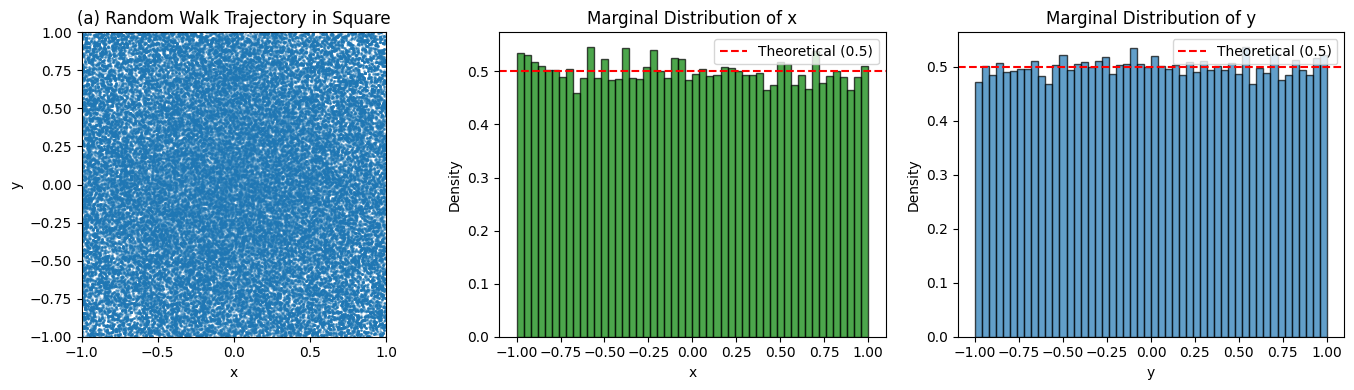

In [149]:
plt.figure(figsize=(14, 4))

plt.subplot(1, 3, 1)
plt.scatter(trajectory[:, 0], trajectory[:, 1], alpha=0.3, s=1)
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.title("(a) Random Walk Trajectory in Square")
plt.xlabel("x")
plt.ylabel("y")
plt.gca().set_aspect('equal')

plt.subplot(1, 3, 2)
plt.hist(trajectory[:, 0], bins=50, density=True, alpha=0.7, edgecolor='black',color='green')
plt.axhline(0.5, color='r', linestyle='--', label='Theoretical (0.5)')
plt.title("Marginal Distribution of x")
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()

plt.subplot(1, 3, 3)
plt.hist(trajectory[:, 1], bins=50, density=True, alpha=0.7, edgecolor='black')
plt.axhline(0.5, color='r', linestyle='--', label='Theoretical (0.5)')
plt.title("Marginal Distribution of y")
plt.xlabel("y")
plt.ylabel("Density")
plt.legend()

plt.tight_layout()
plt.show()

2 -Generate points using random walk in the square with gaussian proposal distribution

In [150]:
# (a) Generate points using random walk in the square and show uniformity
niter = 10**5
x, y = 0.0, 0.0  # Initial position
trajectory = []
accepted = 0
sigma = 0.5  # Standard deviation for symmetric displacement (Gaussian)

for i in range(niter):
    # Propose new position using symmetric Gaussian displacement
    x_prop = x + np.random.normal(0, sigma)
    y_prop = y + np.random.normal(0, sigma)
    
    # Accept only if within square [-1, 1] x [-1, 1]
    if -1 <= x_prop <= 1 and -1 <= y_prop <= 1:
        x, y = x_prop, y_prop
        accepted += 1
    
    trajectory.append([x, y])

trajectory = np.array(trajectory)
acceptance_ratio = accepted / niter

print(f"Acceptance ratio: {acceptance_ratio:.4f}")

Acceptance ratio: 0.6387


# (a) Show uniformity of generated points

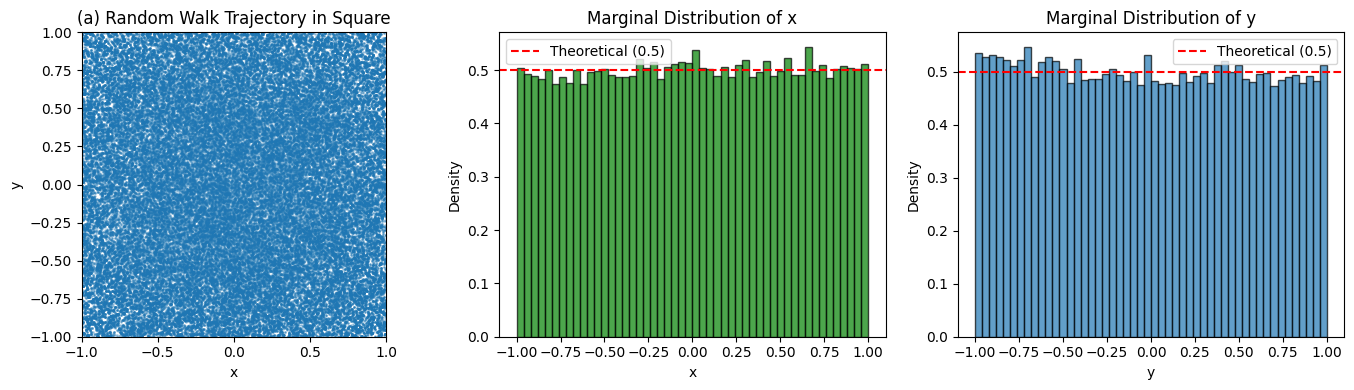

In [151]:
plt.figure(figsize=(14, 4))

plt.subplot(1, 3, 1)
plt.scatter(trajectory[:, 0], trajectory[:, 1], alpha=0.3, s=1)
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.title("(a) Random Walk Trajectory in Square")
plt.xlabel("x")
plt.ylabel("y")
plt.gca().set_aspect('equal')

plt.subplot(1, 3, 2)
plt.hist(trajectory[:, 0], bins=50, density=True, alpha=0.7, edgecolor='black',color='green')
plt.axhline(0.5, color='r', linestyle='--', label='Theoretical (0.5)')
plt.title("Marginal Distribution of x")
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()

plt.subplot(1, 3, 3)
plt.hist(trajectory[:, 1], bins=50, density=True, alpha=0.7, edgecolor='black')
plt.axhline(0.5, color='r', linestyle='--', label='Theoretical (0.5)')
plt.title("Marginal Distribution of y")
plt.xlabel("y")
plt.ylabel("Density")
plt.legend()

plt.tight_layout()
plt.show()

Note: we can notice that the acceptance ratio when we use gaussian is better in this case than uniform with our parameters .

- Gaussian proposals concentrate most jumps near zero (68% within ±σ), making small steps that rarely hit boundaries, resulting in higher acceptance ratios and more stable/predictable chain behavior.
- Uniform proposals spread jumps evenly across [-1,1], generating many large steps that frequently violate domain constraints, leading to lower acceptance and less stable convergence with higher variance in the chain's evolution

#  (b) Estimate π using MCMC and show convergence 

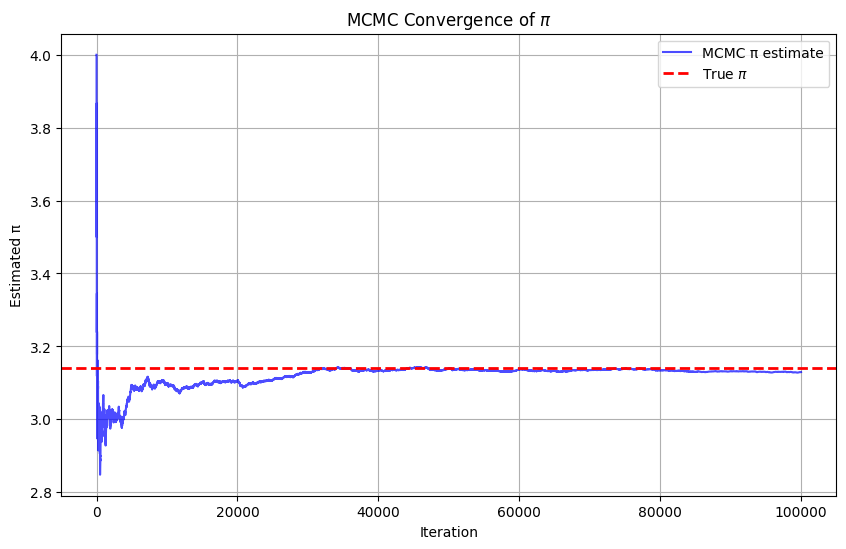


Final π estimate  3.129600
True π value: 3.141593
Acceptance ratio: 0.6387


In [152]:
inside_circle = (trajectory[:, 0]**2 + trajectory[:, 1]**2 <= 1).astype(int)

# Running cumulative mean
cumulative_pi = 4 * np.cumsum(inside_circle) / np.arange(1, niter + 1)

# Plot convergence
plt.figure(figsize=(10, 6))
plt.plot(np.arange(niter), cumulative_pi, label="MCMC π estimate", color='blue', alpha=0.7)
plt.axhline(np.pi, color='r', linestyle='--', linewidth=2, label=r"True $\pi$")
plt.xlabel("Iteration")
plt.ylabel("Estimated π")
plt.title(r"MCMC Convergence of $\pi$")
plt.legend()
plt.grid(True)
plt.show()

final_pi_est = cumulative_pi[-1]
print(f"\nFinal π estimate  {final_pi_est:.6f}")
print(f"True π value: {np.pi:.6f}")
print(f"Acceptance ratio: {acceptance_ratio:.4f}")


# (c) Error bars explanation

 No we cannot construct error bars for the MCMC estimator as we did for the CW1 because:


 - Dependence: The points generated by the Random Walk are not independent; the current position depends on the previous position (it forms a Markov Chain).
 - Autocorrelation: This dependence introduces autocorrelation among the samples. Samples taken close together are highly correlated, meaning they don't provide truly unique, new information.
 - Formula Failure: The standard error formula $\left(\sigma_{\bar{X}} = \frac{\sigma}{\sqrt{N}}\right)$ is only valid for IID samples. 

### **Q2.Gaussian mixture**.  Use the Metropolis algorithm to sample from the following Gaussian mixture:

Acceptance ratios for different sigmas:
----------------------------------------
Sigma =   1: Acceptance ratio = 0.9741
Sigma = 500: Acceptance ratio = 0.0416
Sigma =   8: Acceptance ratio = 0.7883
----------------------------------------


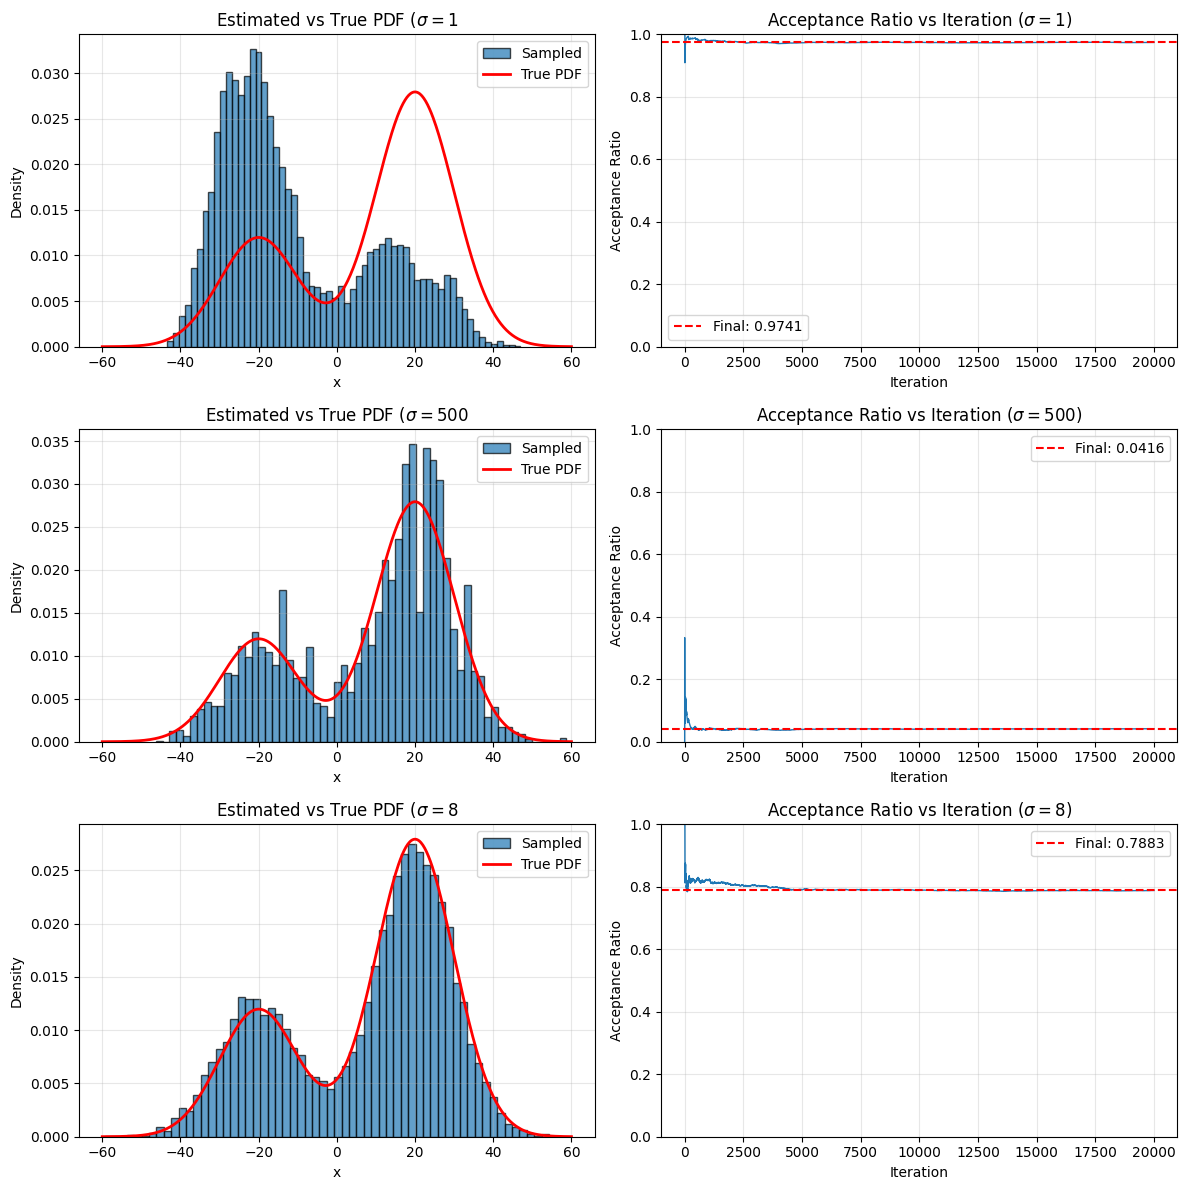

In [153]:

# Define mixture pdf
def gaussian_mixture_pdf(x):
    p1 = stats.norm.pdf(x, loc=-20, scale=10)
    p2 = stats.norm.pdf(x, loc=20, scale=10)
    return 0.3 * p1 + 0.7 * p2

# Ratio
def pdfratio(pdf, x, xtry):
    px = pdf(x)
    pxt = pdf(xtry)
    if px == 0:
        return 1.0
    return pxt / px

# Metropolis sampler
def metropolis_sampler(nsteps=100000, sigma=1.0):
    xsample = np.zeros(nsteps)
    cntlist = np.zeros(nsteps)
    x = 0.0
    cnt = 0.0
    
    for i in range(nsteps):
        # Gaussian displacement with standard deviation sigma
        dx = np.random.normal(0, sigma)
        xtry = x + dx
        
        r = np.random.random()
        if r < min(1.0, pdfratio(gaussian_mixture_pdf, x, xtry)):
            x = xtry
            cnt += 1.0
        
        xsample[i] = x
        cntlist[i] = cnt / (i + 1.0)
    
    return xsample, cntlist, cnt / nsteps

# Sigmas to test
sigmas = [1, 500, 8]
results = {}

print('Acceptance ratios for different sigmas:')
print('-' * 40)

for s in sigmas:
    samples, acc, final_acceptance = metropolis_sampler(nsteps=20000, sigma=s)
    results[s] = (samples, acc, final_acceptance)
    print(f'Sigma = {s:3d}: Acceptance ratio = {final_acceptance:.4f}')

print('-' * 40)

# Plot PDF comparisons and acceptance ratios
xgrid = np.linspace(-60, 60, 500)
true_pdf = gaussian_mixture_pdf(xgrid)

fig, axes = plt.subplots(len(sigmas), 2, figsize=(12, 12))

for idx, s in enumerate(sigmas):
    samples, acc, final_acceptance = results[s]
    
    # PDF histogram vs true pdf
    ax = axes[idx, 0]
    ax.hist(samples, bins=60, density=True, alpha=0.7, label='Sampled', edgecolor='black')
    ax.plot(xgrid, true_pdf, 'r-', linewidth=2, label='True PDF')
    ax.set_title(rf"Estimated vs True PDF ($\sigma={s}$")
    ax.set_xlabel('x')
    ax.set_ylabel('Density')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # Acceptance ratio
    ax2 = axes[idx, 1]
    ax2.plot(acc, linewidth=1)
    ax2.axhline(y=final_acceptance, color='r', linestyle='--', 
                label=f'Final: {final_acceptance:.4f}')
    ax2.set_title(rf"Acceptance Ratio vs Iteration ($\sigma={s}$)")
    ax2.set_xlabel('Iteration')
    ax2.set_ylabel('Acceptance Ratio')
    ax2.set_ylim(0, 1)
    ax2.legend()
    ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [154]:
def explore_metropolis(sigma=8.0, nsteps=20000):
    """
    Interactive function to visualize Metropolis sampling with different parameters.
    
    Parameters:
    - sigma: Standard deviation for Gaussian proposal distribution
    - nsteps: Number of MCMC iterations
    """
    # Run Metropolis sampler
    samples, acc, final_acceptance = metropolis_sampler(nsteps=nsteps, sigma=sigma)
    
    # Generate true PDF for comparison
    xgrid = np.linspace(-60, 60, 500)
    true_pdf = gaussian_mixture_pdf(xgrid)
    
    # Create visualization
    fig, axes = plt.subplots(1, 2, figsize=(16, 4))
    
    # Plot 1: PDF histogram vs true pdf
    ax = axes[0]
    ax.hist(samples, bins=60, density=True, alpha=0.7, label='Sampled', 
            edgecolor='black', color='steelblue')
    ax.plot(xgrid, true_pdf, 'r-', linewidth=2, label='True PDF')
    ax.set_title(rf"Estimated vs True PDF ($\sigma={sigma}$)")
    ax.set_xlabel('x')
    ax.set_ylabel('Density')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # Plot 2: Acceptance ratio
    ax = axes[1]
    ax.plot(acc, linewidth=1, color='green', alpha=0.7)
    ax.axhline(y=final_acceptance, color='r', linestyle='--', linewidth=2,
                label=f'Final: {final_acceptance:.4f}')
    ax.set_title(rf"Acceptance Ratio vs Iteration ($\sigma={sigma}$)")
    ax.set_xlabel('Iteration')
    ax.set_ylabel('Acceptance Ratio')
    ax.set_ylim(0, 1)
    ax.legend()
    ax.grid(True, alpha=0.3)
    

    
    plt.tight_layout()
    plt.show()
    
    # Print statistics
    print(f"{'='*60}")
    print(f"Metropolis Sampling Results")
    print(f"{'='*60}")
    print(rf"Sigma :            {sigma:.2f}")
    print(f"Number of steps:      {nsteps}")
    print(f"Acceptance ratio:     {final_acceptance:.4f}")
    print(f"Mean of samples:      {np.mean(samples):.4f}")
    print(f"Std of samples:       {np.std(samples):.4f}")
    print(f"{'='*60}")
    

# Create interactive widget
interact(explore_metropolis, 
         sigma=FloatSlider(min=0.1, max=1000.0, step=0.5, value=8.0, 
                          description='σ:', continuous_update=False),
         nsteps=IntSlider(min=5000, max=50000, step=5000, value=20000, 
                         description='Steps:', continuous_update=False))

interactive(children=(FloatSlider(value=8.0, continuous_update=False, description='σ:', max=1000.0, min=0.1, s…

<function __main__.explore_metropolis(sigma=8.0, nsteps=20000)>

## Discussion

This plot shows the **Metropolis-Hastings algorithm** sampling from a bimodal distribution (a mixture of two Gaussian peaks). The key insight is how the **step size (σ)** dramatically affects performance:

### What's Happening:

**The Target Distribution:**
- Two Gaussian peaks: one at x=-20 (30% weight) and one at x=+20 (70% weight)
- The algorithm tries to generate random samples that match this distribution

**Three Different Step Sizes:**

1. **σ = 1 (Tiny steps):** 
   - **Acceptance ratio: 97%** - Almost every step is accepted
   - **Problem:** Steps are too small! The sampler gets stuck in one mode and rarely jumps between the two peaks
   - The histogram shows it failed to properly sample the left peak at x=-20

2. **σ = 500 (Giant steps):**
   - **Acceptance ratio: 4%** - Almost every step is rejected
   - **Problem:** Steps are too large! Most proposals land in low-probability regions and get rejected
   - The sampler wastes time by mostly staying in place
   - Poor exploration despite eventually finding both peaks

3. **σ = 8 (Just right):**
   - **Acceptance ratio: 79%** - Balanced acceptance
   - **Success:** The histogram matches the true PDF well, capturing both peaks with correct relative heights
   - Good balance between exploration and acceptance

### The Key Lesson:

**The "Goldilocks Principle"** for MCMC sampling:
- Too small σ → high acceptance but poor exploration (can't jump between modes)
- Too large σ → low acceptance, inefficient sampling (too many rejections)
- Optimal σ → moderate acceptance (~50-80%) with good exploration

### **Q3. Bayesian linear fit.**:

# (a) Generate 50 data points from this model using a = 1, b = 0, and $\sigma$ = 1 (the real, hidden parameter values).

Part (a): Least-Squares Linear Fit Results
True parameters:   a = 1.0000, b = 0.0000, sigma= 1.0000
Fitted parameters: a = 0.9420, b = -0.2255, sigma = 0.9084



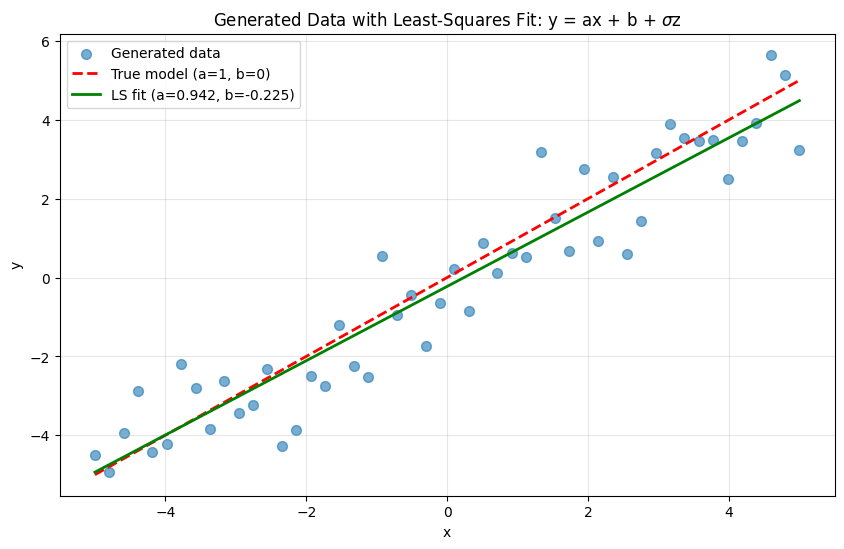

In [155]:
np.random.seed(42)
a_true, b_true, sigma_true = 1, 0, 1
n_data = 50

# Generate x values and corresponding y values
x_data = np.linspace(-5, 5, n_data)
z = np.random.normal(0, 1, n_data)
y_data = a_true * x_data + b_true + sigma_true * z

# Perform least-squares linear fit
coeffs = np.polyfit(x_data, y_data, 1)
a_fit, b_fit = coeffs[0], coeffs[1]

# Calculate residuals and estimate sigma
y_fit = a_fit * x_data + b_fit
residuals = y_data - y_fit
sigma_fit = np.std(residuals)

print("Part (a): Least-Squares Linear Fit Results")
print("=" * 50)
print(rf"True parameters:   a = {a_true:.4f}, b = {b_true:.4f}, sigma= {sigma_true:.4f}")
print(rf"Fitted parameters: a = {a_fit:.4f}, b = {b_fit:.4f}, sigma = {sigma_fit:.4f}")
print("=" * 50)
print()

# Plot the generated data with fit
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, alpha=0.6, label='Generated data', s=50)
plt.plot(x_data, a_true * x_data + b_true, 'r--', linewidth=2, label=f'True model (a={a_true}, b={b_true})')
plt.plot(x_data, y_fit, 'g-', linewidth=2, label=f'LS fit (a={a_fit:.3f}, b={b_fit:.3f})')
plt.xlabel('x')
plt.ylabel('y')
plt.title(r'Generated Data with Least-Squares Fit: y = ax + b + $\sigma$z')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# (b) Likelihood and Posterior.

In [156]:
def log_likelihood(a, b, sigma, x, y):
    """Log likelihood: log p(D|θ)"""
    if sigma <= 0:
        return -np.inf
    n = len(y)
    residuals = y - (a * x + b)
    ss = np.sum(residuals**2)
    return -n/2 * np.log(2 * np.pi * sigma**2) - ss / (2 * sigma**2)

def log_prior(a, b, sigma):
    """Log prior: log p(θ) = log p(a) + log p(b) + log p(σ)"""
    if sigma <= 0:
        return -np.inf
    log_p_a = norm.logpdf(a, loc=0, scale=10)
    log_p_b = norm.logpdf(b, loc=0, scale=10)
    log_p_sigma = norm.logpdf(sigma, loc=0, scale=5)
    return log_p_a + log_p_b + log_p_sigma

def log_posterior(a, b, sigma, x, y):
    """Log posterior: log p(θ|D) = log p(D|θ) + log p(θ)"""
    return log_likelihood(a, b, sigma, x, y) + log_prior(a, b, sigma)

# (c) MCMC Algorithm.

In [157]:
def mcmc_sampler(x, y, n_iterations=50000, proposal_std={'a': 0.1, 'b': 0.1, 'sigma': 0.1}):
    """
    MCMC sampler for Bayesian linear regression
    """
    # Initialize parameters
    a = 0.0
    b = 0.0
    sigma = 1.0
    
    # Storage for samples
    samples_a = np.zeros(n_iterations)
    samples_b = np.zeros(n_iterations)
    samples_sigma = np.zeros(n_iterations)
    
    # Track acceptance
    accept_count = {'a': 0, 'b': 0, 'sigma': 0}
    accept_ratio = np.zeros((n_iterations, 3))  # for a, b, sigma
    
    # Current log posterior
    log_post_current = log_posterior(a, b, sigma, x, y)
    
    for i in range(n_iterations):
        # Propose new a
        a_proposed = a + np.random.normal(0, proposal_std['a'])
        log_post_proposed = log_posterior(a_proposed, b, sigma, x, y)
        
        # Accept/reject for a
        log_ratio = log_post_proposed - log_post_current
        if np.log(np.random.random()) < log_ratio:
            a = a_proposed
            log_post_current = log_post_proposed
            accept_count['a'] += 1
        
        # Propose new b
        b_proposed = b + np.random.normal(0, proposal_std['b'])
        log_post_proposed = log_posterior(a, b_proposed, sigma, x, y)
        
        # Accept/reject for b
        log_ratio = log_post_proposed - log_post_current
        if np.log(np.random.random()) < log_ratio:
            b = b_proposed
            log_post_current = log_post_proposed
            accept_count['b'] += 1
        
        # Propose new sigma
        sigma_proposed = sigma + np.random.normal(0, proposal_std['sigma'])
        log_post_proposed = log_posterior(a, b, sigma_proposed, x, y)
        
        # Accept/reject for sigma
        log_ratio = log_post_proposed - log_post_current
        if np.log(np.random.random()) < log_ratio:
            sigma = sigma_proposed
            log_post_current = log_post_proposed
            accept_count['sigma'] += 1
        
        # Store samples
        samples_a[i] = a
        samples_b[i] = b
        samples_sigma[i] = sigma
        
        # Track acceptance ratios
        accept_ratio[i, 0] = accept_count['a'] / (i + 1)
        accept_ratio[i, 1] = accept_count['b'] / (i + 1)
        accept_ratio[i, 2] = accept_count['sigma'] / (i + 1)
    
    return samples_a, samples_b, samples_sigma, accept_ratio, accept_count

# Run MCMC
print("Running MCMC sampler...")
samples_a, samples_b, samples_sigma, accept_ratio, accept_count = mcmc_sampler(
    x_data, y_data, n_iterations=50000
)

n_iterations = len(samples_a)
final_acceptance = {
    'a': accept_count['a'] / n_iterations,
    'b': accept_count['b'] / n_iterations,
    'sigma': accept_count['sigma'] / n_iterations
}

print("\nFinal Acceptance Ratios:")
print(f"  a:     {final_acceptance['a']:.4f}")
print(f"  b:     {final_acceptance['b']:.4f}")
print(f"  sigma: {final_acceptance['sigma']:.4f}")

Running MCMC sampler...

Final Acceptance Ratios:
  a:     0.4728
  b:     0.7729
  sigma: 0.6895


# (d): Plot results

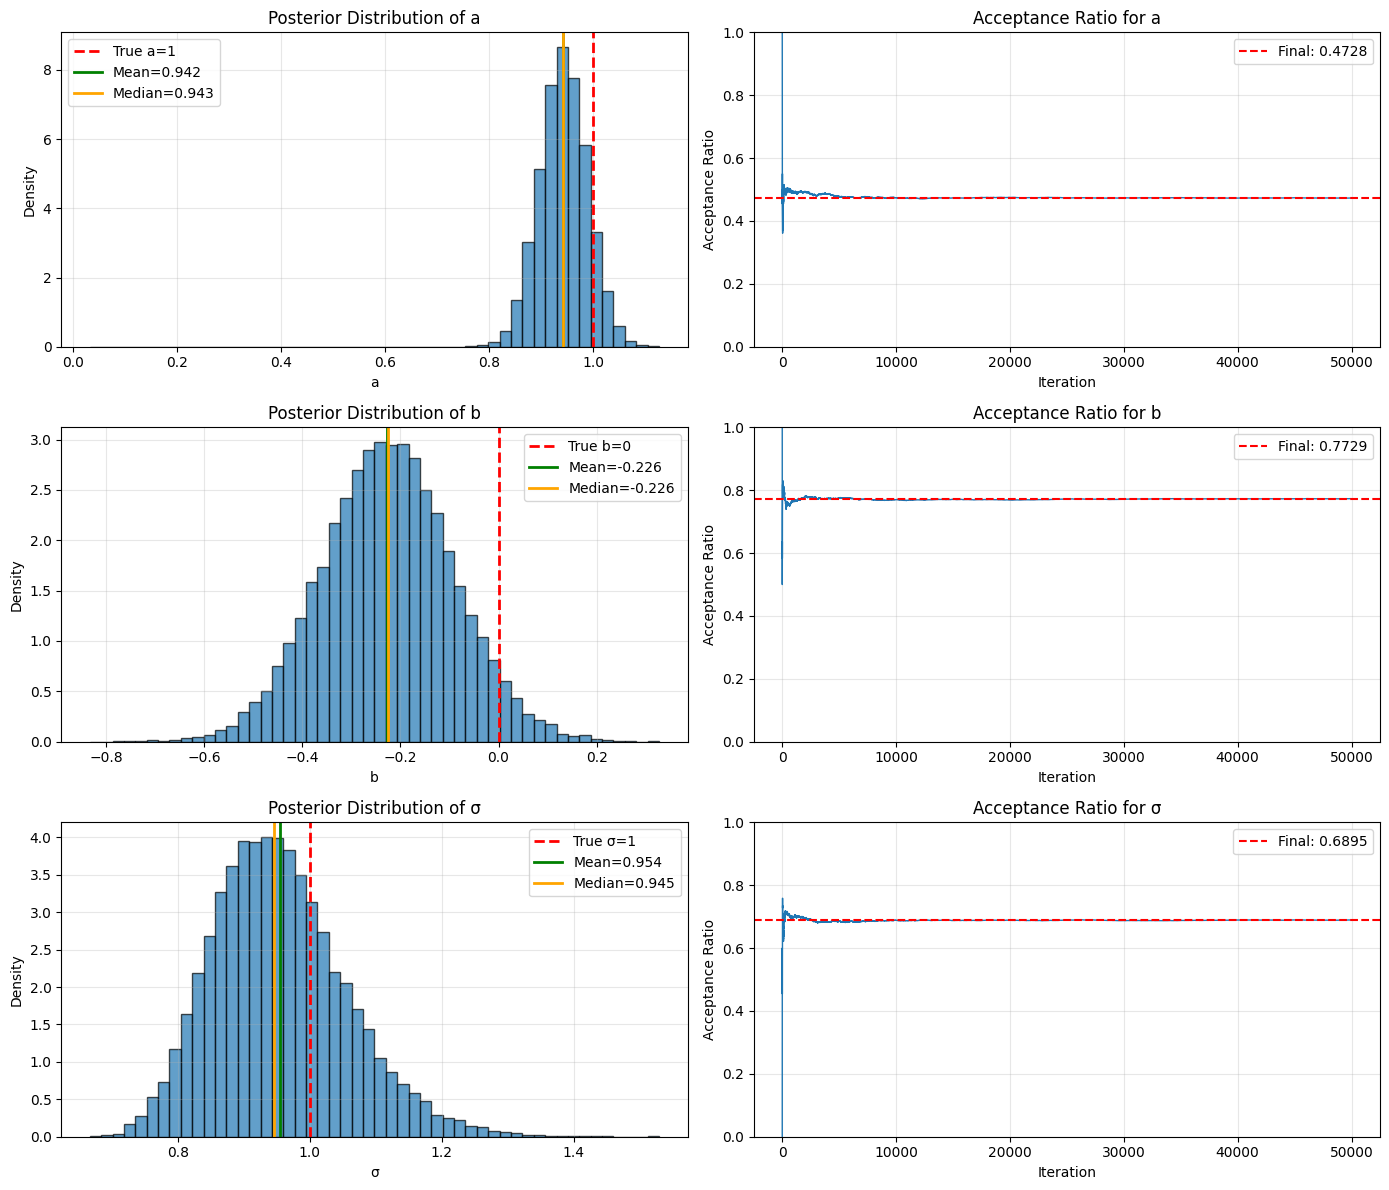

In [158]:
fig, axes = plt.subplots(3, 2, figsize=(14, 12))

# Histograms and acceptance ratios
params = [('a', samples_a, a_true, 0, 'a'), 
          ('b', samples_b, b_true, 1, 'b'), 
          ('σ', samples_sigma, sigma_true, 2, 'sigma')]

for name, samples, true_val, idx, key in params:
    # Histogram
    ax = axes[idx, 0]
    ax.hist(samples, bins=50, density=True, alpha=0.7, edgecolor='black')
    ax.axvline(true_val, color='r', linestyle='--', linewidth=2, label=f'True {name}={true_val}')
    ax.axvline(np.mean(samples), color='g', linestyle='-', linewidth=2, 
               label=f'Mean={np.mean(samples):.3f}')
    ax.axvline(np.median(samples), color='orange', linestyle='-', linewidth=2, 
               label=f'Median={np.median(samples):.3f}')
    ax.set_xlabel(name)
    ax.set_ylabel('Density')
    ax.set_title(f'Posterior Distribution of {name}')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # Acceptance ratio
    ax2 = axes[idx, 1]
    ax2.plot(accept_ratio[:, idx], linewidth=1)
    ax2.axhline(y=final_acceptance[key], color='r', linestyle='--', 
                label=f'Final: {final_acceptance[key]:.4f}')
    ax2.set_xlabel('Iteration')
    ax2.set_ylabel('Acceptance Ratio')
    ax2.set_title(f'Acceptance Ratio for {name}')
    ax2.set_ylim(0, 1)
    ax2.legend()
    ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()




Posterior Summary Statistics:
------------------------------------------------------------
Parameter  True    Mean    Median   Std Dev   95% CI
------------------------------------------------------------
a           1.00    0.942   0.943    0.048   [0.852, 1.032]
b           0.00   -0.226  -0.226    0.135   [-0.490, 0.040]
σ           1.00    0.954   0.945    0.102   [0.780, 1.179]
------------------------------------------------------------


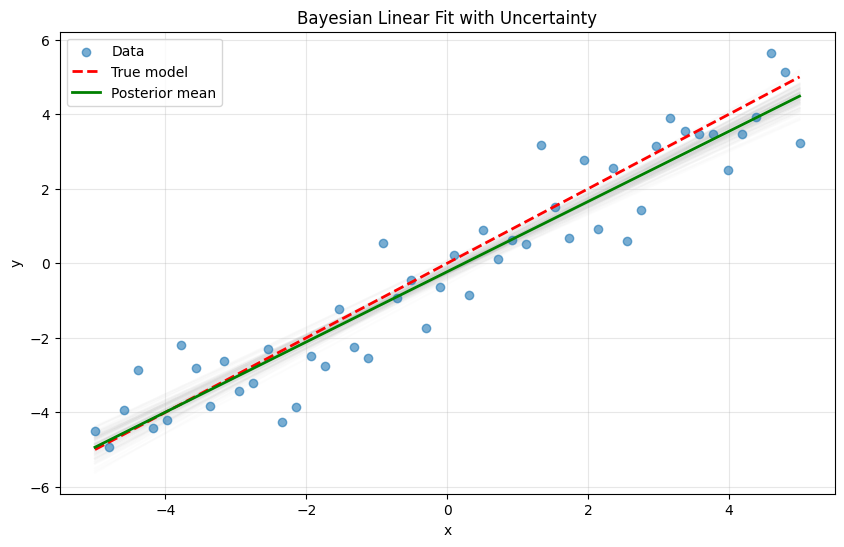


Most probable values (posterior means):
  a = 0.9422
  b = -0.2263
  σ = 0.9540


In [159]:
# Summary statistics
print("\nPosterior Summary Statistics:")
print("-" * 60)
print(f"Parameter  True    Mean    Median   Std Dev   95% CI")
print("-" * 60)
print(f"a          {a_true:5.2f}   {np.mean(samples_a):6.3f}  {np.median(samples_a):6.3f}   "
      f"{np.std(samples_a):6.3f}   [{np.percentile(samples_a, 2.5):.3f}, {np.percentile(samples_a, 97.5):.3f}]")
print(f"b          {b_true:5.2f}   {np.mean(samples_b):6.3f}  {np.median(samples_b):6.3f}   "
      f"{np.std(samples_b):6.3f}   [{np.percentile(samples_b, 2.5):.3f}, {np.percentile(samples_b, 97.5):.3f}]")
print(f"σ          {sigma_true:5.2f}   {np.mean(samples_sigma):6.3f}  {np.median(samples_sigma):6.3f}   "
      f"{np.std(samples_sigma):6.3f}   [{np.percentile(samples_sigma, 2.5):.3f}, {np.percentile(samples_sigma, 97.5):.3f}]")
print("-" * 60)

# Plot predicted vs actual with uncertainty
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, alpha=0.6, label='Data', zorder=3)
plt.plot(x_data, a_true * x_data + b_true, 'r--', linewidth=2, label='True model', zorder=4)

# Use posterior samples to show uncertainty
n_samples_plot = 100
for i in np.random.choice(len(samples_a), n_samples_plot):
    y_pred = samples_a[i] * x_data + samples_b[i]
    plt.plot(x_data, y_pred, 'gray', alpha=0.02, zorder=1)

# Mean prediction
y_pred_mean = np.mean(samples_a) * x_data + np.mean(samples_b)
plt.plot(x_data, y_pred_mean, 'g-', linewidth=2, label='Posterior mean', zorder=5)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Bayesian Linear Fit with Uncertainty')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("\nMost probable values (posterior means):")
print(f"  a = {np.mean(samples_a):.4f}")
print(f"  b = {np.mean(samples_b):.4f}")
print(f"  σ = {np.mean(samples_sigma):.4f}")


##  Parameter Estimates



### **Parameter $a$**

* **Mean (Posterior Average):** **0.942**
* **Median (50th Percentile):** **0.943**
* **True Value (for reference):** 1


### **Parameter $b$**

* **Mean (Posterior Average):** **-0.226**
* **Median (50th Percentile):** **-0.226**
* **True Value (for reference):** 0


### **Parameter $\sigma$**

* **Mean (Posterior Average):** **0.954**
* **Median (50th Percentile):** **0.945**
* **True Value (for reference):** 1